Loading Libraries

In [1]:
import pandas as pd
import numpy as nm
import os
import matplotlib.pyplot as mt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


Loading datasets

In [2]:
data=pd.read_csv(r"C:\Users\.hp\Desktop\EdWisor\Project_1\train.csv", sep=",")
data_test=pd.read_csv(r"C:\Users\.hp\Desktop\EdWisor\Project_1\test.csv",sep=",")


In [3]:
data.head()
data_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [4]:
data.shape


(200000, 202)

In [5]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


    MISSING VALUE ANALYSIS
    

In [6]:
missing_df=pd.DataFrame(data.isnull().sum())
missing_df

In [7]:
missing_df.reset_index()

,index,0
0,ID_code,0
1,target,0
2,var_0,0
3,var_1,0
4,var_2,0
5,var_3,0
6,var_4,0
7,var_5,0
8,var_6,0
9,var_7,0


In [8]:
missing_df=missing_df.rename(columns={'index':'Variables',0:'Missing_Percentages'})

In [9]:
missing_df['Missing_Percentages']=(missing_df['Missing_Percentages']/len(data))*100

In [10]:
missing_df=missing_df.sort_values('Missing_Percentages', ascending=False).reset_index(drop=True)
missing_df

,Missing_Percentages
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [11]:
missing_df.to_csv('Missing_Value_DF', index=False)

In [12]:
#Since no data is missing from the dataset, therefore no need of KNN Imputation

DATA VISUALIZATIONS

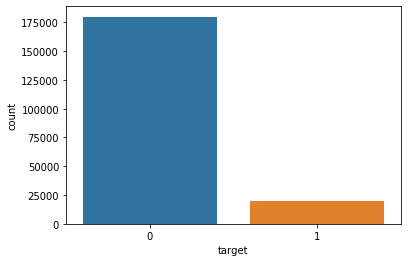

In [55]:
sns.countplot(data['target'])

#Shows the imbalance in the dataset among the categories.

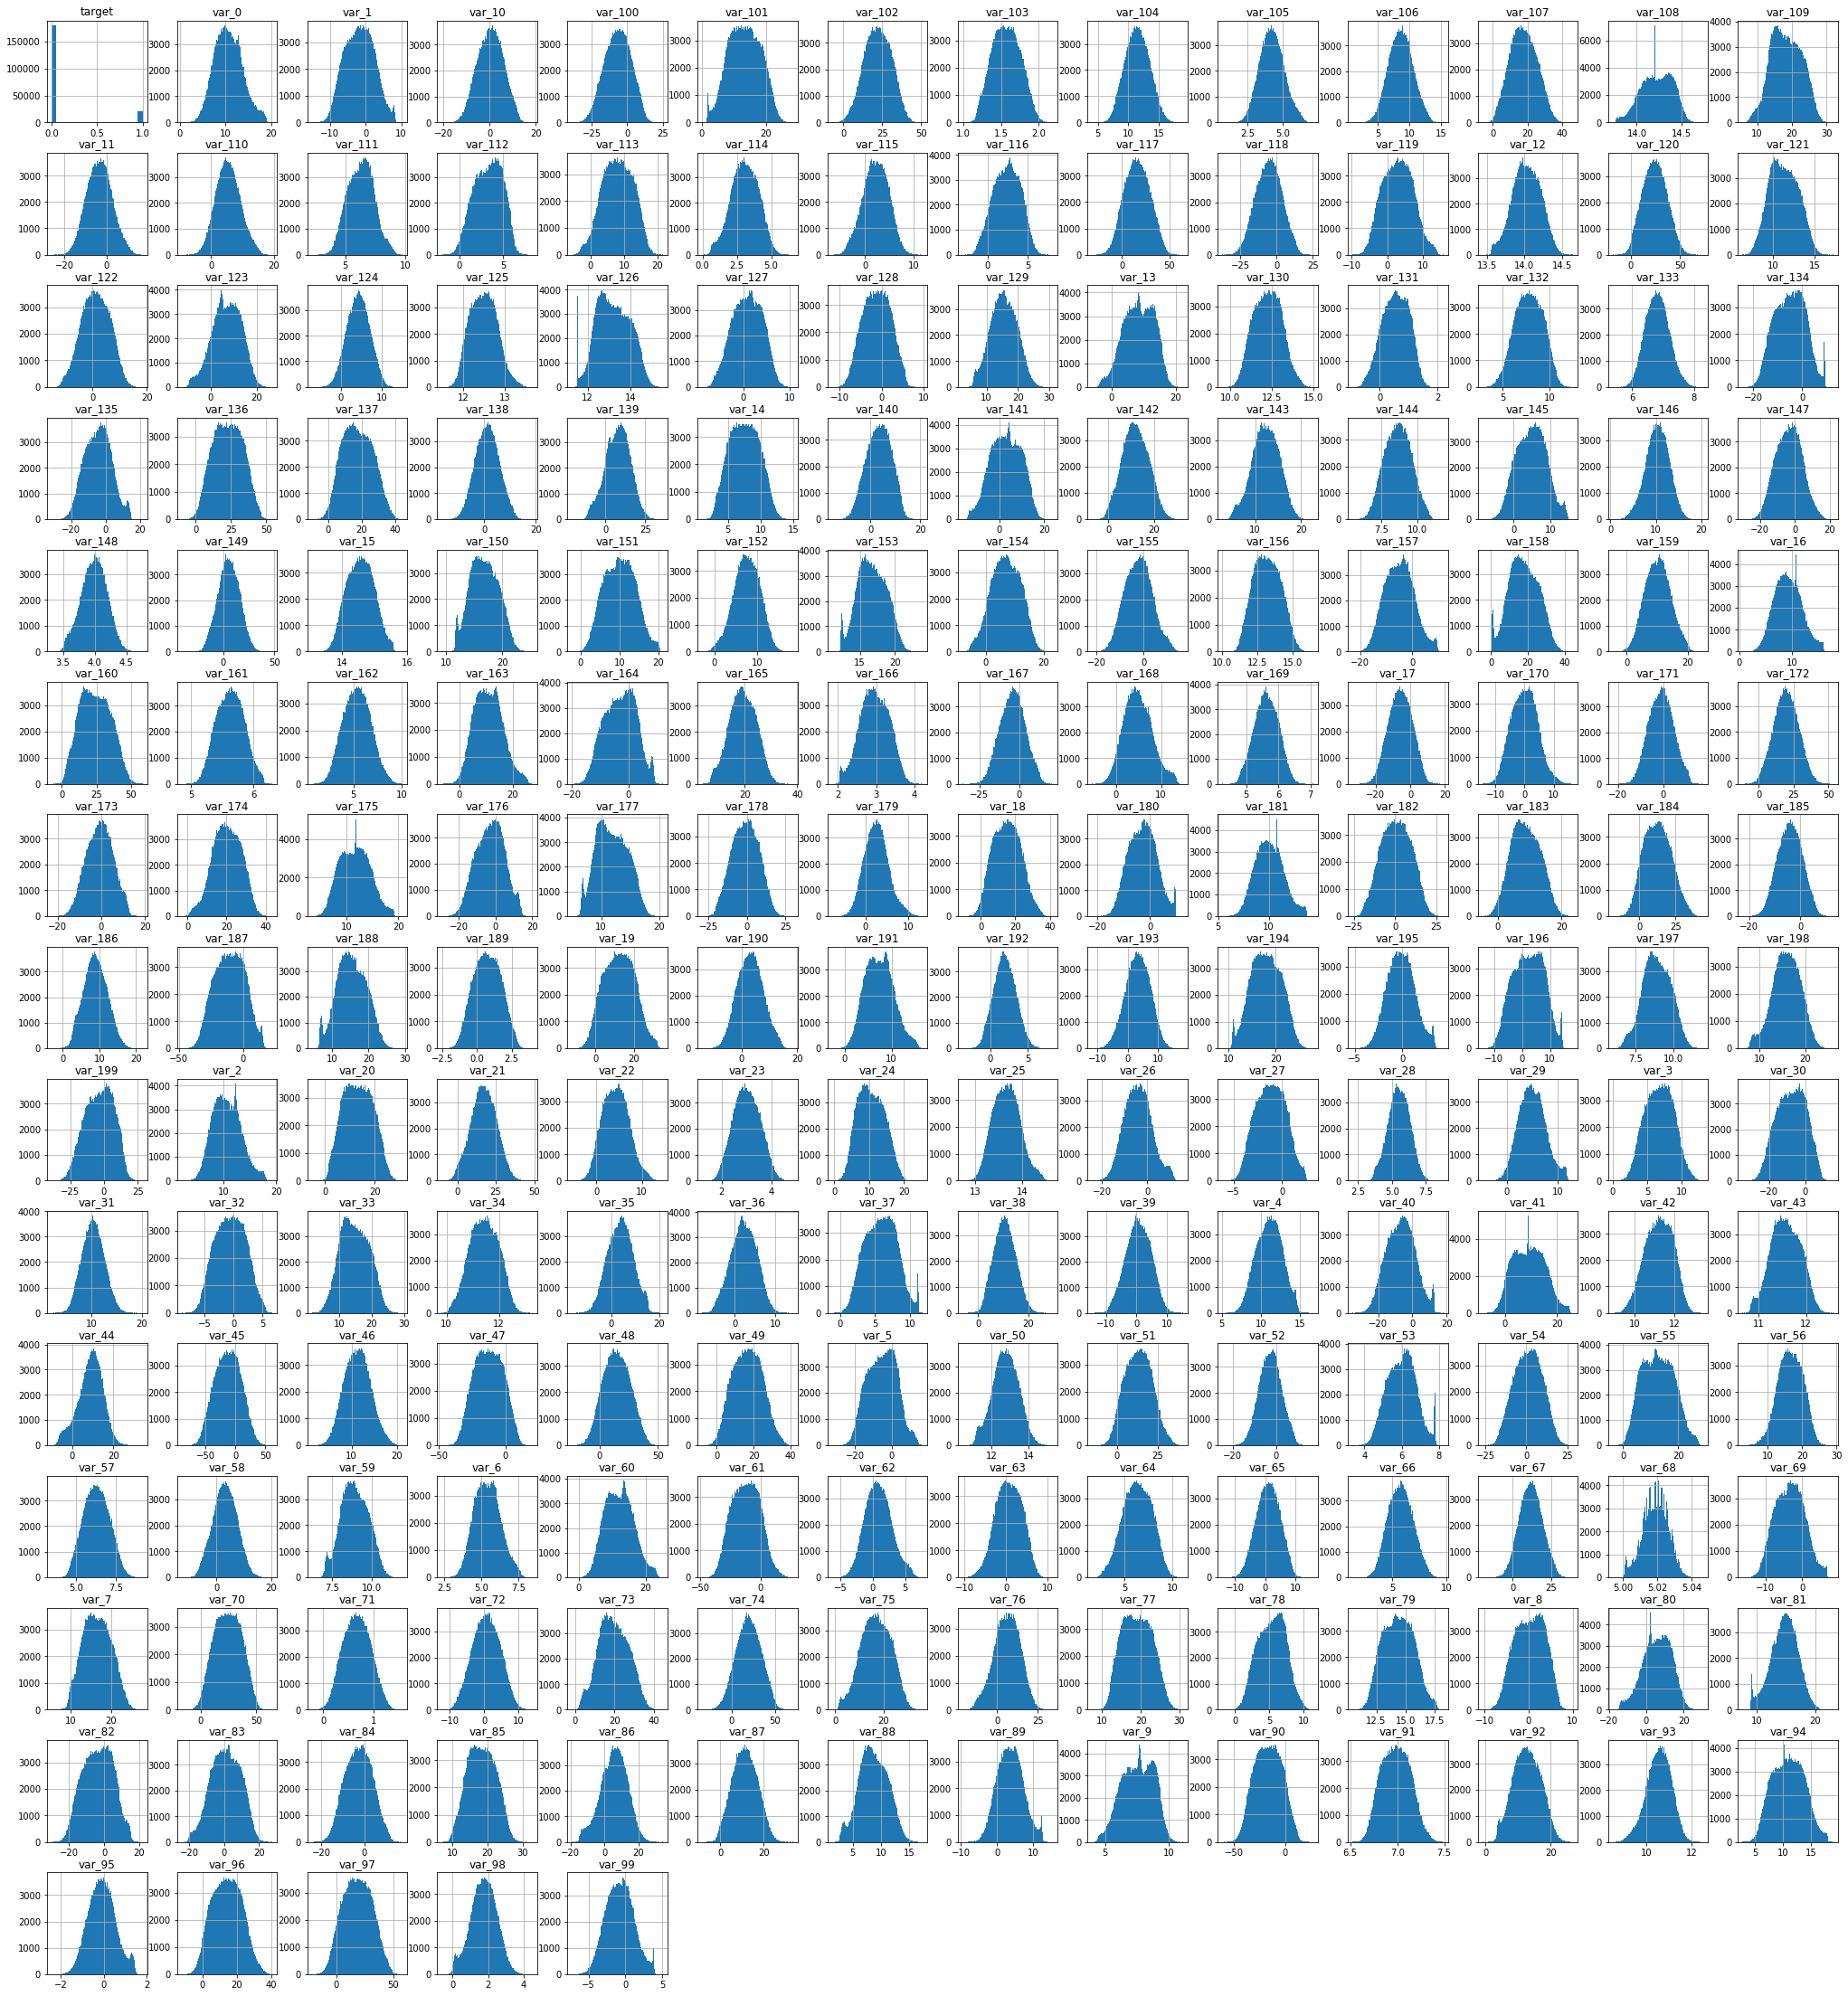

In [60]:
data.hist(figsize = (20,20), bins = 'auto')
mt.subplots_adjust(bottom=1.5, right=1.5, top=3)
mt.show()

SAMPLING OF DATA

In [15]:
label = data.target
features = [c for c in data.columns if c not in ['ID_code','target']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[features], label, test_size = 0.4, random_state = 7)
X_train1, y_train1 = X_train, y_train
X_test1, y_test1 = X_test, y_test


In [17]:
X_train.shape

(120000, 200)

In [18]:
y_train.shape

(120000,)

LOGISTIC REGRESSION

In [19]:
import statsmodels.api as sm

In [20]:
model_log=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.231237
         Iterations 8


In [21]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119800
Method:                           MLE   Df Model:                          199
Date:                Fri, 03 Apr 2020   Pseudo R-squ.:                  0.2900
Time:                        09:11:28   Log-Likelihood:                -27748.
converged:                       True   LL-Null:                       -39080.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0593      0.004     16.393      0.000       0.052       0.066
var_1          0.0429      0.003     15.524      0.000       0.037       0.048
var_2          0.0666      0.004     16.044      0.000       0.058       0.075
var_3          0.0168      0.005      3.070      0.002       0.006       0.028
var_4          0.0246      0.007      3.583      0.000       0.011       0.038
var_5          0.0139      0.001      9.822      0.000       0.011       0.017
var_6          0.2731      0.013     21.368      0.000       0.248       0.298
var_7         -0.0011      0.003     -0.334      0.738      -0.007       0.005
var_8          0.0184      0.003      5.474      0.000       0.012       0.025
var_9         -0.1080      0.009    -12.013      0.000      -0.126      -0.090
var_10        -0.0003      0.002     -0.128      0.898      -0.004       0.004
var_11         0.0132      0.002      7.051      0.000       0.009       0.017
var_12        -1.1232      0.058    -19.463      0.000      -1.236      -1.010
var_13        -0.0370      0.002    -15.512      0.000      -0.042      -0.032
var_14        -0.0087      0.005     -1.750      0.080      -0.019       0.001
var_15         0.1333      0.027      4.921      0.000       0.080       0.186
var_16         0.0061      0.004      1.391      0.164      -0.002       0.015
var_17        -0.0023      0.002     -1.384      0.166      -0.006       0.001
var_18         0.0174      0.001     12.285      0.000       0.015       0.020
var_19         0.0033      0.001      2.367      0.018       0.001       0.006
var_20        -0.0125      0.002     -6.526      0.000      -0.016      -0.009
var_21        -0.0231      0.001    -16.933      0.000      -0.026      -0.020
var_22         0.0677      0.004     17.500      0.000       0.060       0.075
var_23        -0.1667      0.021     -7.861      0.000      -0.208      -0.125
var_24         0.0252      0.003      8.564      0.000       0.019       0.031
var_25         0.1484      0.039      3.813      0.000       0.072       0.225
var_26         0.0326      0.002     17.536      0.000       0.029       0.036
var_27        -0.0098      0.007     -1.340      0.180      -0.024       0.005
var_28        -0.1057      0.014     -7.404      0.000      -0.134      -0.078
var_29         0.0074      0.004      1.737      0.082      -0.001       0.016
var_30        -0.0001      0.001     -0.104      0.917      -0.003       0.003
var_31        -0.0386      0.005     -7.435      0.000      -0.049      -0.028
var_32         0.0375      0.004      8.692      0.000       0.029       0.046
var_33        -0.0344      0.003    -13.242      0.000      -0.040      -0.029
var_34        -0.3306      0.021    -16.023      0.000      -0.371      -0.290
var_35         0.0239      0.002     11.147      0.000       0.020       0.028
var_36        -0.0419      0.004    -11.674      0.000      -0.049      -0.035
var_37         0.0073      0.005      1.469      0.142      -0.002       0.017
va

In [22]:
pre1=model_log.predict(X_test)
pre1

190687    0.106009
188397    0.165304
172427    0.049495
13122     0.063547
11684     0.317329
174115    0.120538
77770     0.012743
156321    0.001811
148107    0.132769
171320    0.053787
177529    0.040364
51400     0.000171
132294    0.046809
78612     0.180172
170892    0.004328
106195    0.037181
142232    0.079760
90633     0.315738
129363    0.007272
127325    0.022412
190712    0.062467
153485    0.339173
21321     0.028267
28806     0.009884
146900    0.272464
89536     0.007089
52027     0.017111
167912    0.590598
97138     0.004639
58576     0.242910
            ...   
128646    0.035154
30030     0.410374
77764     0.149011
52498     0.066002
86338     0.227410
44921     0.530753
27511     0.053956
138439    0.008990
170354    0.054777
48742     0.106516
118204    0.150165
128804    0.010007
130917    0.010476
122348    0.003147
116925    0.061948
131123    0.310088
178065    0.211531
21984     0.084047
186939    0.026692
161768    0.148953
156167    0.008824
140470    0.

In [23]:
a=0
b=0
len(pre1)

80000

In [24]:
for x in range(0,len(pre1)):
    if pre1.iloc[x] > 0.5 : 
        a=a+1
    else:
        b=b+1
print ("The value of a:", a ,"The value of b: ", b)

The value of a: 3220 The value of b:  76780


In [25]:
from sklearn.metrics import confusion_matrix 


In [26]:
for m in range(0,len(pre1)):
    if pre1.iloc[m]>0.5:
        pre1.iloc[m]=1
    else:
        pre1.iloc[m]=0
        


In [27]:
CM = confusion_matrix(y_test, pre1)
CM = pd.crosstab(y_test, pre1)
CM

col_0,0.0,1.0
target,,
0,70933,1001
1,5847,2219


In [28]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [29]:
#Recall TP Rate
recall=(TP/(TP+FN))
recall

0.27510538060996775

In [30]:
#Precision
precision_log=(TP/(TP+FP))
precision_log

0.6891304347826087

In [31]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pre1)
auc

0.6305949234631566

DECISION TREE

In [32]:
 from sklearn.tree import DecisionTreeClassifier

In [33]:
#Building DT model

In [34]:
DT_model=DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [35]:
#Predicting the values

In [36]:
DT_pred=DT_model.predict(X_test)
DT_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
#Verifying using Error Metrics

In [38]:
c=0
d=0
for x in range(0,len(DT_pred)):
    if DT_pred[x]>0.5:
        DT_pred[x]=1
        c=c+1
    else:
        DT_pred[x]=0
        d=d+1
        
print("the value of c:",c,"the value of d:", d, "length of pre:", len(DT_pred))

the value of c: 8245 the value of d: 71755 length of pre: 80000


In [39]:
CM2 = confusion_matrix(y_test, DT_pred)
CM2 = pd.crosstab(y_test, DT_pred)
CM2


col_0,0,1
target,,
0,65247,6687
1,6508,1558


In [40]:
TN = CM2.iloc[0,0]
FN = CM2.iloc[1,0]
TP = CM2.iloc[1,1]
FP = CM2.iloc[0,1]

In [41]:
#Recall TP Rate
recall=(TP/(TP+FN))
recall

0.1931564592115051

In [42]:
#Precision
precision_log=(TP/(TP+FP))
precision_log

0.1889630078835658

In [43]:
auc = roc_auc_score(y_test, DT_pred)
auc

0.5500981228412184

RANDOM FOREST

In [44]:
from  sklearn.ensemble import RandomForestClassifier

In [45]:
RF_model=RandomForestClassifier(n_estimators=50, random_state = 0).fit(X_train1, y_train1)

In [46]:
RF_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [47]:
RF_pred=RF_model.predict(X_test)


In [48]:
CM3 = confusion_matrix(y_test, RF_pred)
CM3 = pd.crosstab(y_test, RF_pred)

In [49]:
TN = CM3.iloc[0,0]
FN = CM3.iloc[1,0]
TP = CM3.iloc[1,1]
FP = CM3.iloc[0,1]


In [50]:
        #Recall TP Rate
        recall=(TP/(TP+FN))
        recall

0.0009918175055789735

In [51]:
#Precision
precision_log=(TP/(TP+FP))
precision_log

1.0

In [52]:
    auc = roc_auc_score(y_test, RF_pred)
    auc

0.5004959087527895